# Gantt Chart

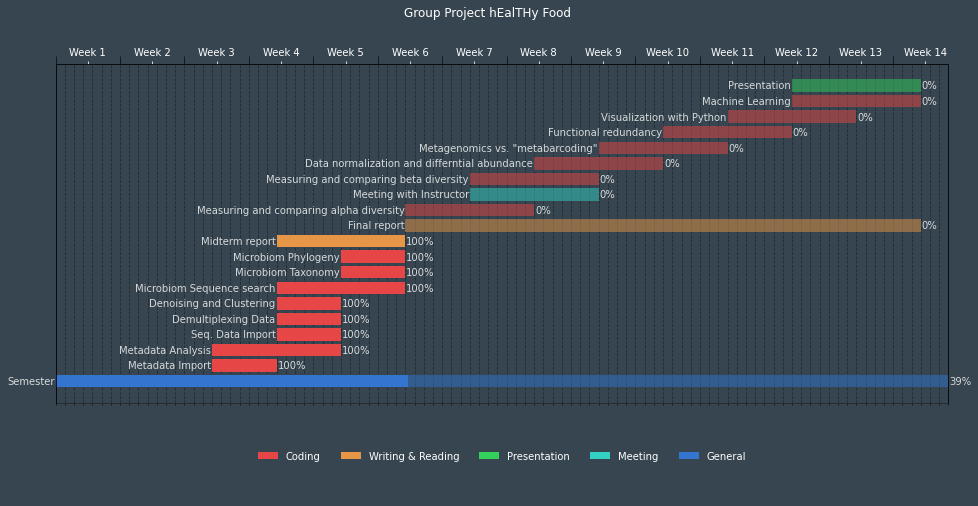

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

##### DATA #####
data = {'Task': {0: 'Semester',
                 1: 'Metadata Import',
                 2: 'Metadata Analysis',
                 3: 'Seq. Data Import',
                 4: 'Demultiplexing Data',
                 5: 'Denoising and Clustering',
                 6: 'Microbiom Sequence search',
                 7: 'Microbiom Taxonomy',
                 8: 'Microbiom Phylogeny',
                 9: 'Midterm report',
                10: 'Final report',
                11: 'Measuring and comparing alpha diversity',
                12: 'Meeting with Instructor',
                13: 'Measuring and comparing beta diversity',
                14: 'Data normalization and differntial abundance',
                15: 'Metagenomics vs. "metabarcoding"',
                16: 'Functional redundancy',
                17: 'Visualization with Python',
                18: 'Machine Learning',
                19: 'Presentation'},

 'Department': {0: 'General',
                1: 'Coding',
                2: 'Coding',
                3: 'Coding',
                4: 'Coding',
                5: 'Coding',
                6: 'Coding',
                7: 'Coding',
                8: 'Coding',
                9: 'Writing & Reading',
                10: 'Writing & Reading',
                11: 'Coding',
                12: 'Meeting',
                13: 'Coding',
                14: 'Coding',
                15: 'Coding',
                16: 'Coding',
                17: 'Coding',
                18: 'Coding',
                19: 'Presentation'},
 
 'Start': {0: Timestamp('2022-09-17 00:00:00'),
           1: Timestamp('2022-10-4 00:00:00'),
           2: Timestamp('2022-10-4 00:00:00'),
           3: Timestamp('2022-10-11 00:00:00'),
           4: Timestamp('2022-10-11 00:00:00'),
           5: Timestamp('2022-10-11 00:00:00'),
           6: Timestamp('2022-10-11 00:00:00'),
           7: Timestamp('2022-10-18 00:00:00'),
           8: Timestamp('2022-10-18 00:00:00'),
           9: Timestamp('2022-10-11 00:00:00'),
           10: Timestamp('2022-10-25 00:00:00'),
           11: Timestamp('2022-10-25 00:00:00'),
           12: Timestamp('2022-11-1 00:00:00'),
           13: Timestamp('2022-11-1 00:00:00'),
           14: Timestamp('2022-11-8 00:00:00'),
           15: Timestamp('2022-11-15 00:00:00'),
           16: Timestamp('2022-11-22 00:00:00'),
           17: Timestamp('2022-11-29 00:00:00'),
           18: Timestamp('2022-12-6 00:00:00'),
           19: Timestamp('2022-12-6 00:00:00')
           },
 
 'End': {0: Timestamp('2022-12-23 00:00:00'),
         1: Timestamp('2022-10-11 00:00:00'),
         2: Timestamp('2022-10-18 00:00:00'),
         3: Timestamp('2022-10-18 00:00:00'),
         4: Timestamp('2022-10-18 00:00:00'),
         5: Timestamp('2022-10-18 00:00:00'),
         6: Timestamp('2022-10-25 00:00:00'),
         7: Timestamp('2022-10-25 00:00:00'),
         8: Timestamp('2022-10-25 00:00:00'),
         9: Timestamp('2022-10-25 00:00:00'),
        10: Timestamp('2022-12-20 00:00:00'),
        11: Timestamp('2022-11-8 00:00:00'),
        12: Timestamp('2022-11-15 00:00:00'),
        13: Timestamp('2022-11-15 00:00:00'),
        14: Timestamp('2022-11-22 00:00:00'),
        15: Timestamp('2022-11-29 00:00:00'),
        16: Timestamp('2022-12-6 00:00:00'),
        17: Timestamp('2022-12-13 00:00:00'),
        18: Timestamp('2022-12-20 00:00:00'),
        19: Timestamp('2022-12-20 00:00:00')
         },
 
 'Completion': {0: 0.395,
                1: 1.0,
                2: 1.0,
                3: 1.0,
                4: 1.0,
                5: 1.0,
                6: 1.0,
                7: 1.0,
                8: 1.0,
                9: 1.0,
                10: 0.0,
                11: 0.0,
                12: 0.0,
                13: 0.0,
                14: 0.0,
                15: 0.0,
                16: 0.0,
                17: 0.0,
                18: 0.0,
                19: 0.0
                }}


##### DATA PREP ##### 
df = pd.DataFrame(data)

# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'Coding':'#E64646', 'Writing & Reading':'#E69646', 'Presentation':'#34D05C', 'Meeting':'#34D0C3','General':'#3475D0'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(16,8), gridspec_kw={'height_ratios':[6, 1]}, facecolor='#36454F')
ax.set_facecolor('#36454F')
ax1.set_facecolor('#36454F')
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8, color='w')
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8, color='w')


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')

# ticks
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3], color='w')
ax.set_xticks([])
ax.set_yticks([])

plt.setp([ax.get_xticklines()], color='w')

# ticks top
# create a new axis with the same y
ax_top = ax.twiny()

# align x axis
ax.set_xlim(0, df.end_num.max())
ax_top.set_xlim(0, df.end_num.max())

# top ticks (markings)
xticks_top_minor = np.arange(0, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_minor, minor=True, color='w')
# top ticks (label)
xticks_top_major = np.arange(3.5, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_major, minor=False, color='w')
# week labels
xticks_top_labels = [f"Week {i}"for i in np.arange(1, len(xticks_top_major)+1, 1)]
ax_top.set_xticklabels(xticks_top_labels, ha='center', minor=False, color='w')

# hide major tick (we only want the label)
ax_top.tick_params(which='major', color='w')
# increase minor ticks (to marks the weeks start and end)
ax_top.tick_params(which='minor', length=8, color='k')


# align x axis
ax.set_xlim(0, df.end_num.max())

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')



plt.suptitle('Group Project hEalTHy Food', color='w')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Coding'),
                   Patch(facecolor='#E69646', label='Writing & Reading'),
                   Patch(facecolor='#34D05C', label='Presentation'),
                   Patch(facecolor='#34D0C3', label='Meeting'),
                   Patch(facecolor='#3475D0', label='General')]

legend = ax1.legend(handles=legend_elements, loc='upper center', ncol=5, frameon=False)
plt.setp(legend.get_texts(), color='w')

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

plt.savefig('figures/gantt_dark.png', facecolor='#36454F')

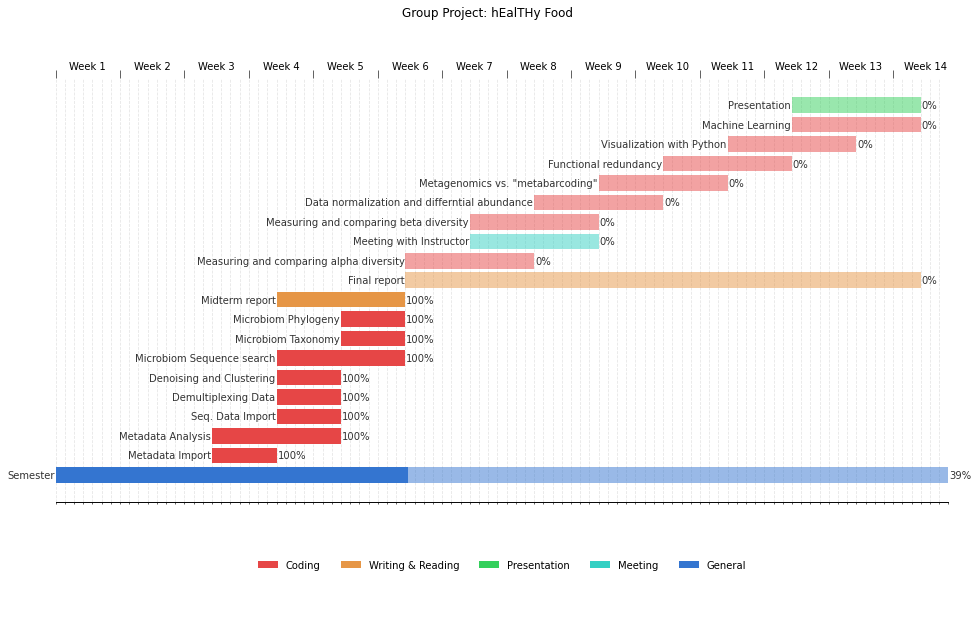

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

##### DATA #####
data = {'Task': {0: 'Semester',
                 1: 'Metadata Import',
                 2: 'Metadata Analysis',
                 3: 'Seq. Data Import',
                 4: 'Demultiplexing Data',
                 5: 'Denoising and Clustering',
                 6: 'Microbiom Sequence search',
                 7: 'Microbiom Taxonomy',
                 8: 'Microbiom Phylogeny',
                 9: 'Midterm report',
                10: 'Final report',
                11: 'Measuring and comparing alpha diversity',
                12: 'Meeting with Instructor',
                13: 'Measuring and comparing beta diversity',
                14: 'Data normalization and differntial abundance',
                15: 'Metagenomics vs. "metabarcoding"',
                16: 'Functional redundancy',
                17: 'Visualization with Python',
                18: 'Machine Learning',
                19: 'Presentation'},

 'Department': {0: 'General',
                1: 'Coding',
                2: 'Coding',
                3: 'Coding',
                4: 'Coding',
                5: 'Coding',
                6: 'Coding',
                7: 'Coding',
                8: 'Coding',
                9: 'Writing & Reading',
                10: 'Writing & Reading',
                11: 'Coding',
                12: 'Meeting',
                13: 'Coding',
                14: 'Coding',
                15: 'Coding',
                16: 'Coding',
                17: 'Coding',
                18: 'Coding',
                19: 'Presentation'},
 
 'Start': {0: Timestamp('2022-09-17 00:00:00'),
           1: Timestamp('2022-10-4 00:00:00'),
           2: Timestamp('2022-10-4 00:00:00'),
           3: Timestamp('2022-10-11 00:00:00'),
           4: Timestamp('2022-10-11 00:00:00'),
           5: Timestamp('2022-10-11 00:00:00'),
           6: Timestamp('2022-10-11 00:00:00'),
           7: Timestamp('2022-10-18 00:00:00'),
           8: Timestamp('2022-10-18 00:00:00'),
           9: Timestamp('2022-10-11 00:00:00'),
           10: Timestamp('2022-10-25 00:00:00'),
           11: Timestamp('2022-10-25 00:00:00'),
           12: Timestamp('2022-11-1 00:00:00'),
           13: Timestamp('2022-11-1 00:00:00'),
           14: Timestamp('2022-11-8 00:00:00'),
           15: Timestamp('2022-11-15 00:00:00'),
           16: Timestamp('2022-11-22 00:00:00'),
           17: Timestamp('2022-11-29 00:00:00'),
           18: Timestamp('2022-12-6 00:00:00'),
           19: Timestamp('2022-12-6 00:00:00')
           },
 
 'End': {0: Timestamp('2022-12-23 00:00:00'),
         1: Timestamp('2022-10-11 00:00:00'),
         2: Timestamp('2022-10-18 00:00:00'),
         3: Timestamp('2022-10-18 00:00:00'),
         4: Timestamp('2022-10-18 00:00:00'),
           5: Timestamp('2022-10-18 00:00:00'),
           6: Timestamp('2022-10-25 00:00:00'),
           7: Timestamp('2022-10-25 00:00:00'),
           8: Timestamp('2022-10-25 00:00:00'),
           9: Timestamp('2022-10-25 00:00:00'),
           10: Timestamp('2022-12-20 00:00:00'),
           11: Timestamp('2022-11-8 00:00:00'),
           12: Timestamp('2022-11-15 00:00:00'),
           13: Timestamp('2022-11-15 00:00:00'),
           14: Timestamp('2022-11-22 00:00:00'),
           15: Timestamp('2022-11-29 00:00:00'),
           16: Timestamp('2022-12-6 00:00:00'),
           17: Timestamp('2022-12-13 00:00:00'),
           18: Timestamp('2022-12-20 00:00:00'),
        19: Timestamp('2022-12-20 00:00:00')
         },
 
 'Completion': {0: 0.395,
                1: 1.0,
                2: 1.0,
                3: 1.0,
                4: 1.0,
                5: 1.0,
                6: 1.0,
                7: 1.0,
                8: 1.0,
                9: 1.0,
                10: 0.0,
                11: 0.0,
                12: 0.0,
                13: 0.0,
                14: 0.0,
                15: 0.0,
                16: 0.0,
                17: 0.0,
                18: 0.0,
                19: 0.0
                }}


##### DATA PREP ##### 
df = pd.DataFrame(data)

# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'Coding':'#E64646', 'Writing & Reading':'#E69646', 'Presentation':'#34D05C', 'Meeting':'#34D0C3','General':'#3475D0'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(16,10), gridspec_kw={'height_ratios':[6, 1]})

# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8)
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8)


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2, which='both')

# ticks
#xticks = np.arange(0, df.end_num.max()+1, 3)
#xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
#ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticks([]) # hide the date 
#ax.set_xticklabels(xticks_labels[::3])
ax.set_yticks([])

# ticks top
# create a new axis with the same y
ax_top = ax.twiny()

# align x axis
ax.set_xlim(0, df.end_num.max())
ax_top.set_xlim(0, df.end_num.max())

# top ticks (markings)
xticks_top_minor = np.arange(0, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_minor, minor=True)
# top ticks (label)
xticks_top_major = np.arange(3.5, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_major, minor=False)
# week labels
xticks_top_labels = [f"Week {i}"for i in np.arange(1, len(xticks_top_major)+1, 1)]
ax_top.set_xticklabels(xticks_top_labels, ha='center', minor=False)

# hide major tick (we only want the label)
ax_top.tick_params(which='major', color='w')
# increase minor ticks (to marks the weeks start and end)
ax_top.tick_params(which='minor', length=8, color='k')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)

ax_top.spines['right'].set_visible(False)
ax_top.spines['left'].set_visible(False)
ax_top.spines['top'].set_visible(False)

plt.suptitle('Group Project: hEalTHy Food')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Coding'),
                   Patch(facecolor='#E69646', label='Writing & Reading'),
                   Patch(facecolor='#34D05C', label='Presentation'),
                   Patch(facecolor='#34D0C3', label='Meeting'),
                   Patch(facecolor='#3475D0', label='General')]

ax1.legend(handles=legend_elements, loc='upper center', ncol=5, frameon=False)

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

#plt.show()
plt.savefig('figures/gantt.png')